# 01. 데이터 확인

In [1]:
import pandas as pd

In [54]:
live = pd.read_csv("C:/Users/daum0/Downloads/카카오톡 받은 파일/주차난 프로젝트/중구 주차난 분석/merged_data.csv")
live.head()

,주차장명,주소,총 주차면,현재 주차 차량수,날짜,시간,요일
0,DDP동측(양쪽) 관광버스전용 주차장(시),중구 을지로7가 2-36,20,12,2024-2-13,0:0,화요일
1,DDP북측 마장로 관광버스전용 주차장(시),중구 신당동 222-3,4,2,2024-2-13,0:0,화요일
2,남대문 시장 관광버스전용 주차장(시),중구 남창동 51-4,2,3,2024-2-13,0:0,화요일
3,남대문 초입 관광버스전용 주차장(시),중구 남창동 282-10,3,3,2024-2-13,0:0,화요일
4,남대문 화물 공영주차장(시),중구 남대문로4가 24-1,9,3,2024-2-13,0:0,화요일


In [55]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15624 entries, 0 to 15623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   주차장명       15624 non-null  object
 1   주소         15624 non-null  object
 2   총 주차면      15624 non-null  int64 
 3   현재 주차 차량수  15624 non-null  int64 
 4   날짜         15624 non-null  object
 5   시간         15624 non-null  object
 6   요일         15624 non-null  object
dtypes: int64(2), object(5)
memory usage: 854.6+ KB


In [56]:
live.shape

(15624, 7)

In [57]:
live.isnull().sum()

주차장명         0
주소           0
총 주차면        0
현재 주차 차량수    0
날짜           0
시간           0
요일           0
dtype: int64

# 01. 날짜, 시간 합치기

In [58]:
live['시간'] = pd.to_datetime(live['시간'], format='%H:%M').dt.strftime('%H:%M:%S')

datetime = pd.to_datetime(live['날짜'] + ' ' + live['시간'])
live['날짜'] = datetime

live

,주차장명,주소,총 주차면,현재 주차 차량수,날짜,시간,요일
0,DDP동측(양쪽) 관광버스전용 주차장(시),중구 을지로7가 2-36,20,12,2024-02-13 00:00:00,00:00:00,화요일
1,DDP북측 마장로 관광버스전용 주차장(시),중구 신당동 222-3,4,2,2024-02-13 00:00:00,00:00:00,화요일
2,남대문 시장 관광버스전용 주차장(시),중구 남창동 51-4,2,3,2024-02-13 00:00:00,00:00:00,화요일
3,남대문 초입 관광버스전용 주차장(시),중구 남창동 282-10,3,3,2024-02-13 00:00:00,00:00:00,화요일
4,남대문 화물 공영주차장(시),중구 남대문로4가 24-1,9,3,2024-02-13 00:00:00,00:00:00,화요일
...,...,...,...,...,...,...,...
15619,청계5가 공영주차장(시),중구 을지로6가 17-442 0,20,30,2024-02-19 23:40:00,23:40:00,월요일
15620,청계6(동평화) 공영주차장(시),중구 신당동 217-91 0,6,6,2024-02-19 23:40:00,23:40:00,월요일
15621,청계6(신평화시장앞) 공영주차장(시),중구 신당동 217-91 0,7,8,2024-02-19 23:40:00,23:40:00,월요일
15622,청계6(청평화) 공영주차장(시),중구 신당동 217-91 0,5,4,2024-02-19 23:40:00,23:40:00,월요일


In [59]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15624 entries, 0 to 15623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   주차장명       15624 non-null  object        
 1   주소         15624 non-null  object        
 2   총 주차면      15624 non-null  int64         
 3   현재 주차 차량수  15624 non-null  int64         
 4   날짜         15624 non-null  datetime64[ns]
 5   시간         15624 non-null  object        
 6   요일         15624 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 854.6+ KB


---

# 02. 시간대/주차장별 주차수

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


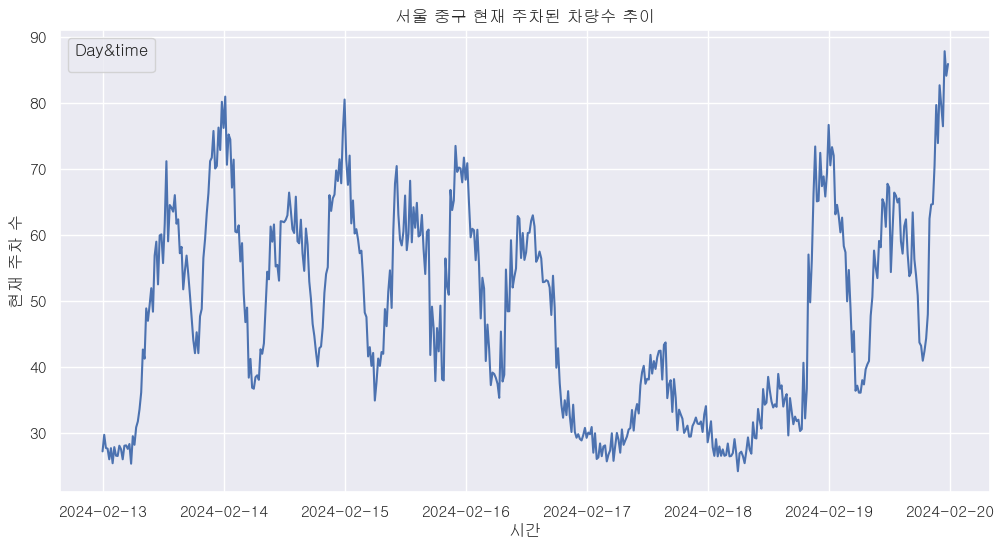

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# 오류 방지
import warnings
warnings.filterwarnings('ignore')

# 한글 깨짐
plt.rcParams['font.family'] = 'Gulim'

grouped_data = live.groupby(['날짜', '현재 주차 차량수']).sum().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='날짜', y='현재 주차 차량수', ci=None)
plt.xlabel('시간')
plt.ylabel('현재 주차 수')
plt.title('서울 중구 현재 주차된 차량수 추이')
plt.legend(title='Day&time')
plt.grid(True)
plt.show()

# 03. 주차장별 주차 수 추이

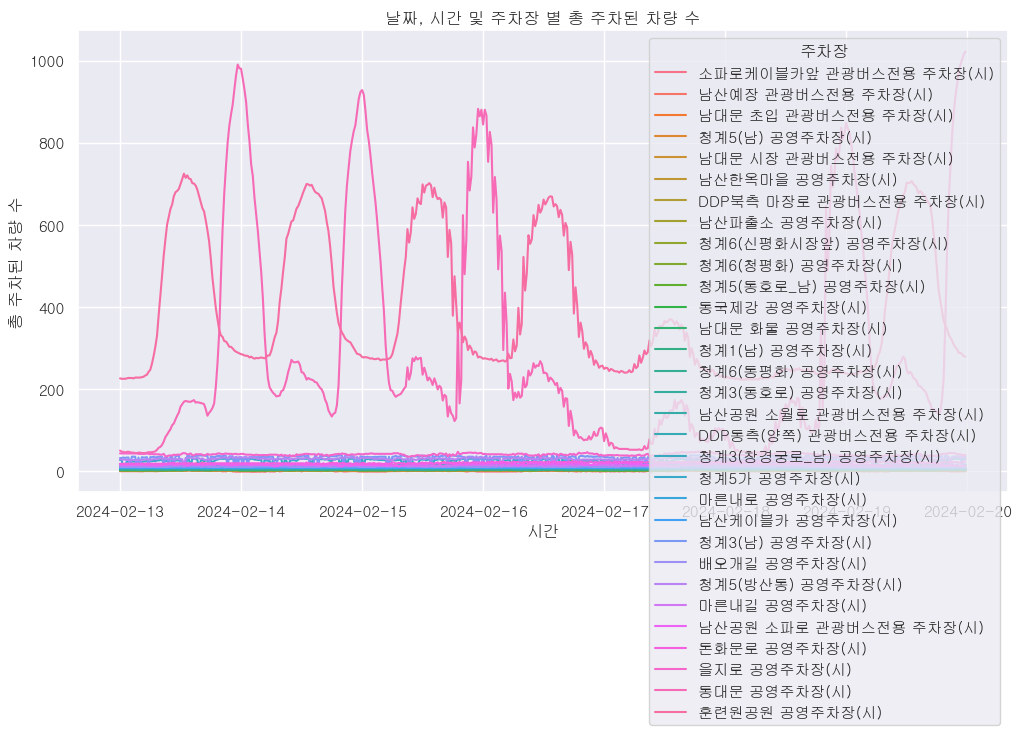

In [61]:
grouped_data = live.groupby(['날짜', '주차장명']).sum().reset_index()

# 주차장 별 주차된 차량 수 기준으로 내림차순으로 정렬
sorted_data = grouped_data.sort_values(by='현재 주차 차량수', ascending=True)


# Seaborn을 사용하여 플로팅합니다
plt.figure(figsize=(12, 6))
sns.lineplot(data=sorted_data, x='날짜', y='현재 주차 차량수', hue='주차장명', ci=None)
plt.xlabel('시간')
plt.ylabel('총 주차된 차량 수')
plt.title('날짜, 시간 및 주차장 별 총 주차된 차량 수')
plt.legend(title='주차장')
plt.grid(True)
plt.show()

## 3-1 TOP N

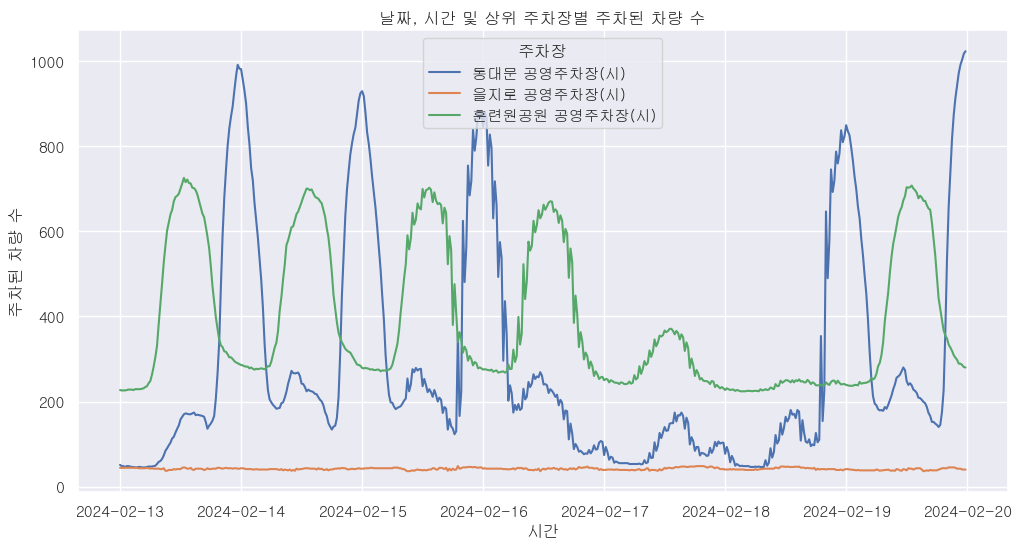

In [62]:
grouped_data = live.groupby(['날짜', '주차장명'])['현재 주차 차량수'].sum().reset_index()

# 각 주차장별로 주차된 차량의 총 수를 기준으로 내림차순
sorted_data = grouped_data.groupby('주차장명')['현재 주차 차량수'].sum().sort_values(ascending=False)


N = 3  # 선택할 상위 주차장의 수
top_parking_lots = sorted_data.head(N).index.tolist()

filtered_data = grouped_data[grouped_data['주차장명'].isin(top_parking_lots)]

# Seaborn을 사용하여 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='날짜', y='현재 주차 차량수', hue='주차장명', ci=None)
plt.xlabel('시간')
plt.ylabel('주차된 차량 수')
plt.title('날짜, 시간 및 상위 주차장별 주차된 차량 수')
plt.legend(title='주차장')
plt.grid(True)
plt.show()

# 04. 시간대, 주차장별 현재 주차 수

In [63]:
import matplotlib.font_manager as fm
import matplotlib.dates as mpl_dates

In [64]:
grouped_data = live.groupby(['날짜', '주차장명'])['현재 주차 차량수'].sum().reset_index()

#  히트맵에 맞는 형식으로 데이터프레임을 변환
pivot_data = grouped_data.pivot_table(index='날짜', columns='주차장명', values='현재 주차 차량수', fill_value=0)

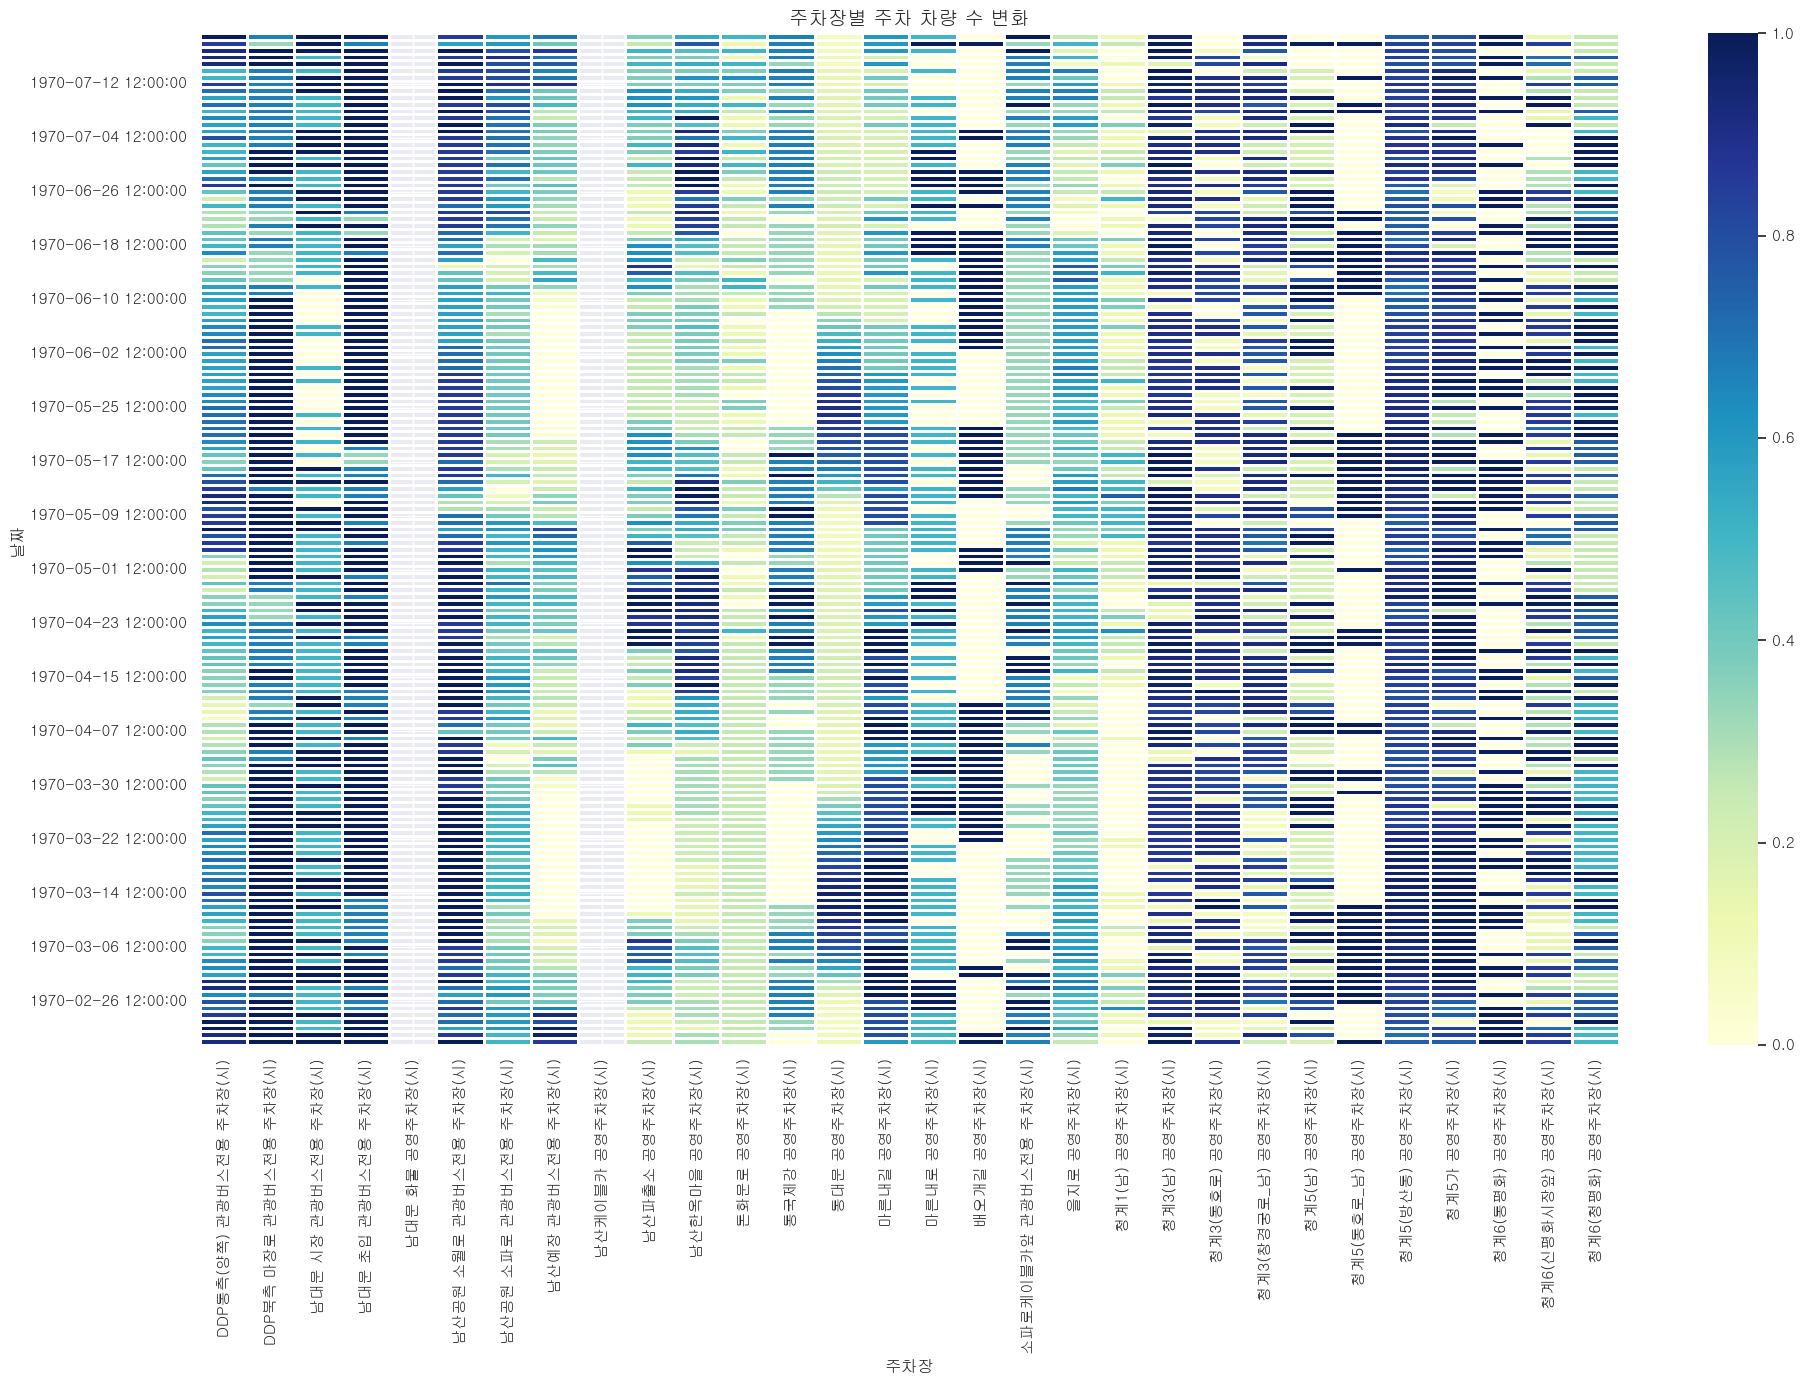

In [65]:
plt.rcParams['font.family'] = 'gulim'  # 나눔고딕 폰트를 사용하도록 설정
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 부호가 깨지지 않도록 설정

# 히트맵에 사용할 데이터가 이미 정규화된 경우 아래 코드를 사용할 수 있습니다.
# normalized_data = pivot_data

# 데이터를 [0, 1] 범위로 정규화
normalized_data = (pivot_data - pivot_data.min()) / (pivot_data.max() - pivot_data.min())

# Heatmap plotting
plt.figure(figsize=(20, 14))  # Adjust the figure size

# 전체 데이터를 히트맵으로 그림
sns.heatmap(normalized_data, cmap='YlGnBu', annot=False, linewidths=1)

plt.xlabel('주차장', fontsize=12)  # Adjust label font size and use Korean label
plt.ylabel('날짜', fontsize=12)    # Adjust label font size and use Korean label
plt.title('주차장별 주차 차량 수 변화', fontsize=14)  # Adjust title font size and use Korean title

# Zoom-in을 위해 x축과 y축의 범위 설정
plt.xlim(0, 30)  # x축 범위를 0부터 20까지로 설정 (원하는 기간으로 조정)
plt.ylim(50, 200)  # y축 범위를 50부터 200까지로 설정 (원하는 기간으로 조정)


# Horizontal line in each cell
for i in range(len(normalized_data.columns) + 1):
    plt.axhline(i, color='grey', lw=0.5)
    
date_format = mpl_dates.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.gca().yaxis.set_major_formatter(date_format)

plt.yticks(rotation=0)  # Rotate y-axis labels for better alignment

plt.tight_layout()
plt.show()

> - 색이 짙을수록 주차장의 주차 차량 대수가 많아 혼잡하다는 뜻이며, 2개의 공영주차장이 흰색으로 나타난 이유는 주차 차량 출입의 변화가 없어 Min-Max 스케일 값이 0이기 때문이다.


---

# 05. 총 주차면

In [66]:
fixed_parking_data = live.groupby('주차장명')['총 주차면'].first().reset_index()
fixed_parking_data

,주차장명,총 주차면
0,DDP동측(양쪽) 관광버스전용 주차장(시),20
1,DDP북측 마장로 관광버스전용 주차장(시),4
2,남대문 시장 관광버스전용 주차장(시),2
3,남대문 초입 관광버스전용 주차장(시),3
4,남대문 화물 공영주차장(시),9
5,남산공원 소월로 관광버스전용 주차장(시),12
6,남산공원 소파로 관광버스전용 주차장(시),21
7,남산예장 관광버스전용 주차장(시),39
8,남산케이블카 공영주차장(시),21
9,남산파출소 공영주차장(시),13


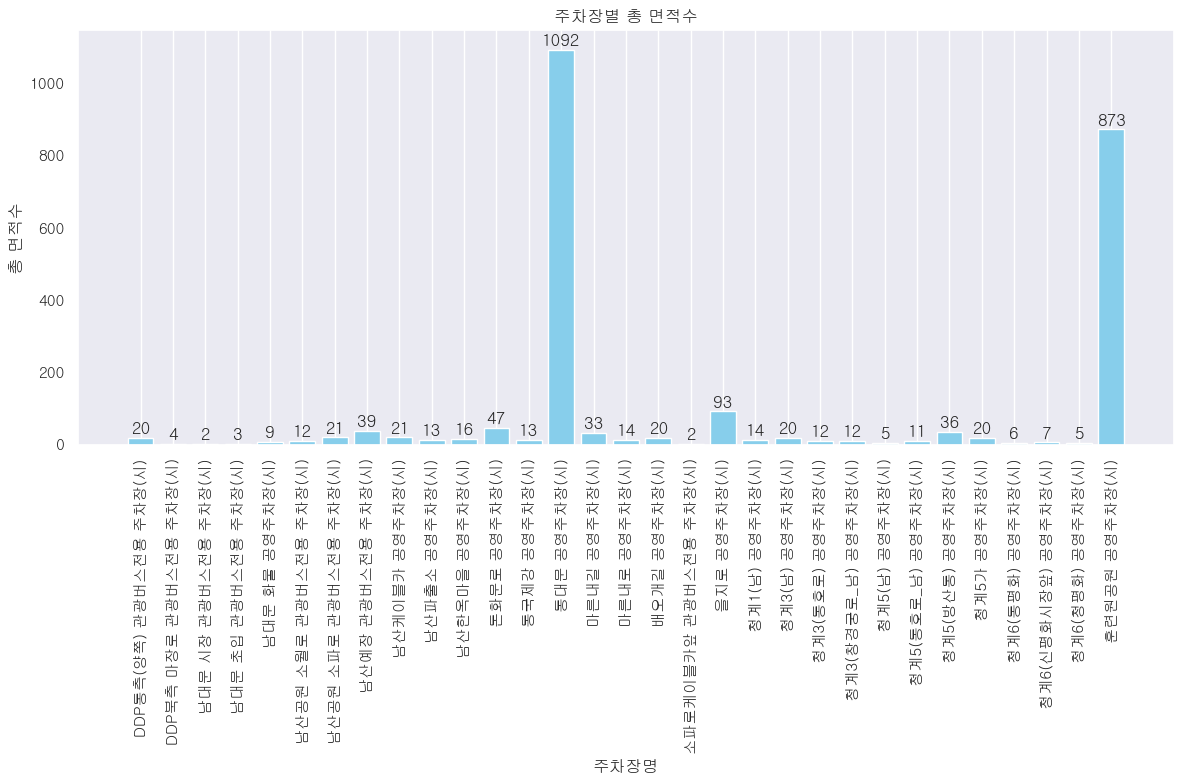

In [67]:
plt.figure(figsize=(12, 8))
plt.bar(fixed_parking_data['주차장명'], fixed_parking_data['총 주차면'], color='skyblue')

plt.xlabel('주차장명')
plt.ylabel('총 면적수')
plt.title('주차장별 총 면적수')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Adding labels on top of each bar
for i, v in enumerate(fixed_parking_data['총 주차면']):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

---

# 06. 잔여석 확인

In [68]:
# 잔여석& 비율 컬럼 추가
new_column_data1 = live['총 주차면']-live['현재 주차 차량수']
live.insert(loc=5, column='잔여석',  value=new_column_data1 )

new_column_data2 = round(live['현재 주차 차량수'] / live['총 주차면'], 1)
live.insert(loc=6, column='비율', value=new_column_data2)

live

,주차장명,주소,총 주차면,현재 주차 차량수,날짜,잔여석,비율,시간,요일
0,DDP동측(양쪽) 관광버스전용 주차장(시),중구 을지로7가 2-36,20,12,2024-02-13 00:00:00,8,0.6,00:00:00,화요일
1,DDP북측 마장로 관광버스전용 주차장(시),중구 신당동 222-3,4,2,2024-02-13 00:00:00,2,0.5,00:00:00,화요일
2,남대문 시장 관광버스전용 주차장(시),중구 남창동 51-4,2,3,2024-02-13 00:00:00,-1,1.5,00:00:00,화요일
3,남대문 초입 관광버스전용 주차장(시),중구 남창동 282-10,3,3,2024-02-13 00:00:00,0,1.0,00:00:00,화요일
4,남대문 화물 공영주차장(시),중구 남대문로4가 24-1,9,3,2024-02-13 00:00:00,6,0.3,00:00:00,화요일
...,...,...,...,...,...,...,...,...,...
15619,청계5가 공영주차장(시),중구 을지로6가 17-442 0,20,30,2024-02-19 23:40:00,-10,1.5,23:40:00,월요일
15620,청계6(동평화) 공영주차장(시),중구 신당동 217-91 0,6,6,2024-02-19 23:40:00,0,1.0,23:40:00,월요일
15621,청계6(신평화시장앞) 공영주차장(시),중구 신당동 217-91 0,7,8,2024-02-19 23:40:00,-1,1.1,23:40:00,월요일
15622,청계6(청평화) 공영주차장(시),중구 신당동 217-91 0,5,4,2024-02-19 23:40:00,1,0.8,23:40:00,월요일


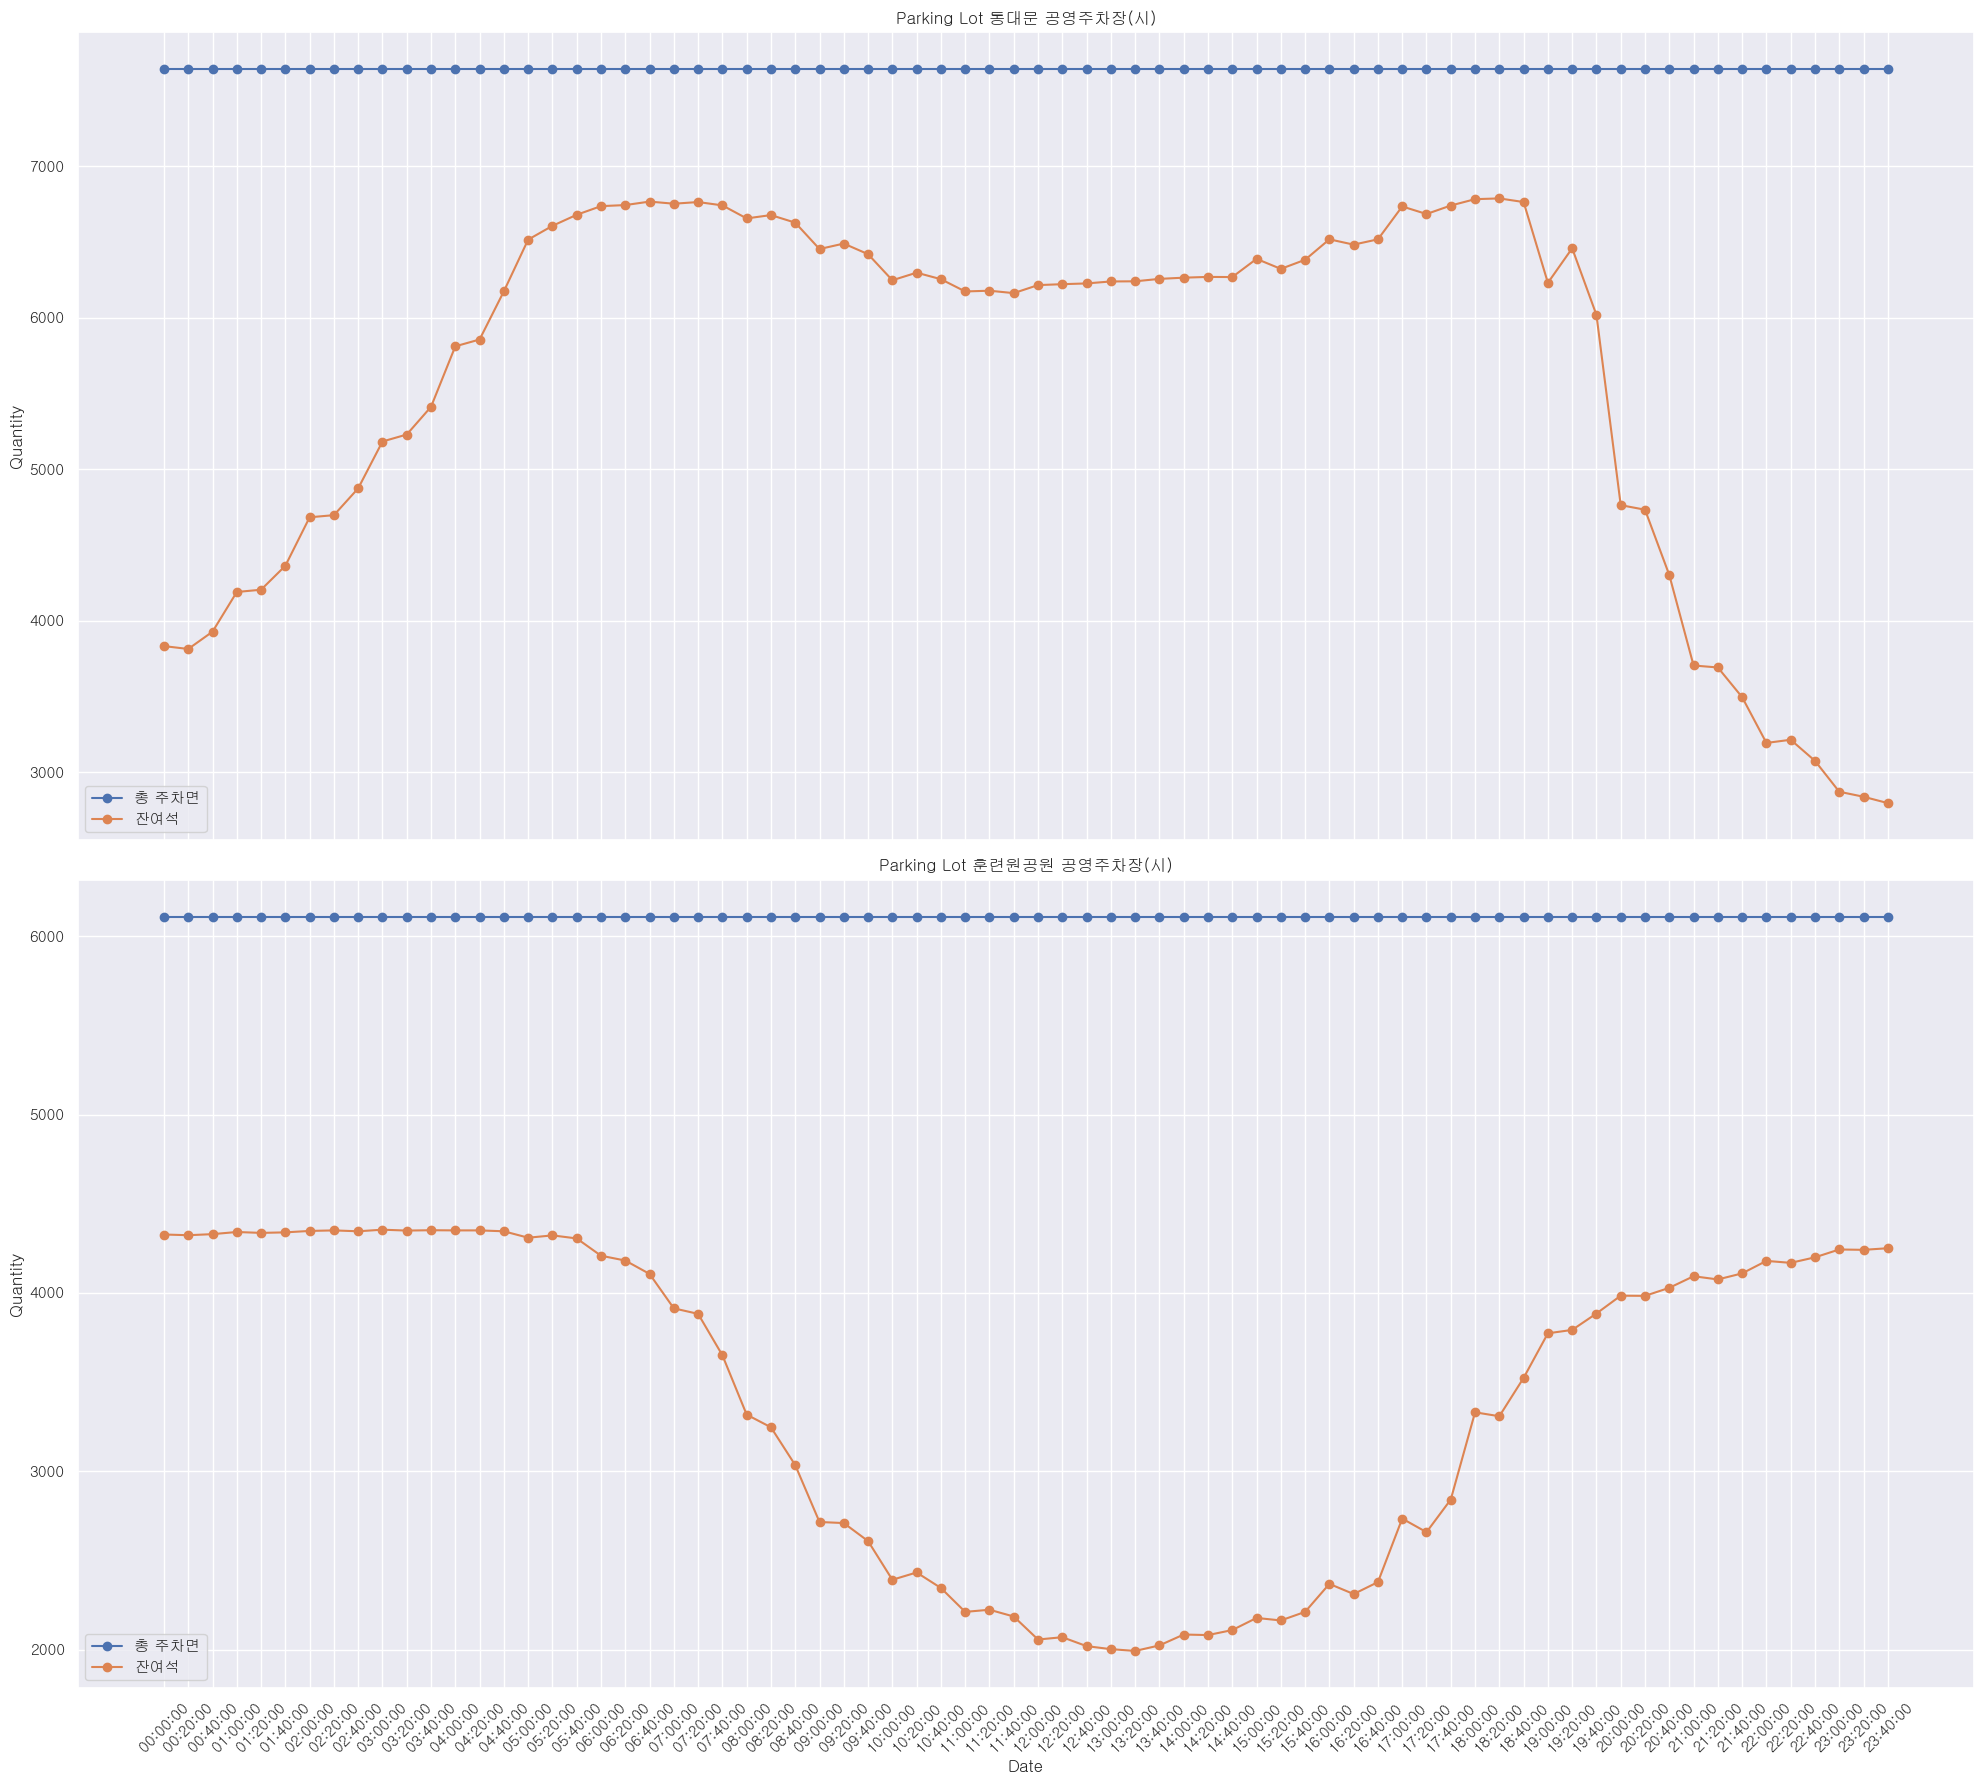

In [69]:
grouped_data = live.groupby(['시간', '주차장명']).sum().reset_index()

# 시각화
parking_lots_to_plot = ['동대문 공영주차장(시)', '훈련원공원 공영주차장(시)']  # Select a subset of parking lots to plot

fig, axs = plt.subplots(len(parking_lots_to_plot), 1, figsize=(20, 18), sharex=True)

for i, parking_lot in enumerate(parking_lots_to_plot):
    parking_lot_data = grouped_data[grouped_data['주차장명'] == parking_lot]
    axs[i].plot(parking_lot_data['시간'], parking_lot_data['총 주차면'], label='총 주차면', marker='o')
    axs[i].plot(parking_lot_data['시간'], parking_lot_data['잔여석'], label='잔여석', marker='o')
#    axs[i].plot(parking_lot_data['날짜'], parking_lot_data['비율'], label='비율', marker='o')
    axs[i].set_ylabel('Quantity')
    axs[i].set_title(f'Parking Lot {parking_lot}')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---